导入所有的包。所有可更改的参数在第一个BLOCK中修改。

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import math

random.seed(20221230)# 写这个的日期

# PARMAS

RADIUS = 3          # 覆盖半径
N = 20              # 圆个数
N_sample = 10000    # 采样点个数


In [2]:
def judge_distance(p1:list[int], p2:list[int], radius):
    '''
    判断p1 是否在以p2为圆心半径为radius的圆内
    为了方便生成圆心的坐标均为整数
    '''
    return (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 < radius**2

def filter(origin_data:list[list[int]]):
    '''
    用Hashmap清洗重复的坐标
    '''
    return list({str(each):each for each in origin_data}.values())

def rect(origin:list[int],radius:int):
    '''
    用来返回最小外接矩形的顶点坐标
    返回x_min, y_min, x_max, y_max
    '''
    y_data = [each[1] for each in origin]
    x_data = [each[0] for each in origin]
    # return min(x_data), min(y_data), max(x_data), max(y_data)
    return min(x_data)-radius, min(y_data)-radius, max(x_data)+radius, max(y_data)+radius

def generate_sample(N_sample,x_min,y_min,x_max, y_max):
    '''
    生成矩形区域的采样点集合
    '''
    return [[random.uniform(x_min, x_max),random.uniform(y_min, y_max)] for _ in range(N_sample)]

In [3]:

int_list = [list(each) for each in list(itertools.product(range(0, 50), range(0, 50)))]
circle_list = random.sample(int_list, N)
filtered = filter(circle_list)
x_data, y_data = zip(*filtered) 
data = {"X":'x', "Y":'y'}
x_data = list(x_data)
y_data = list(y_data)

画图。值得注意的是才是画出的"圆"并不准确符合真实的半径大小，只是为了展示“覆盖范围”的大概效果。

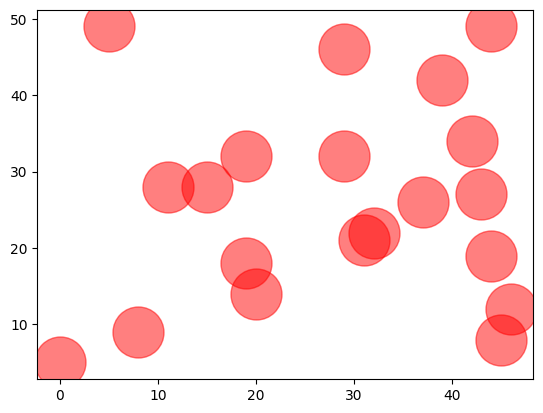

In [4]:
plt.scatter(x=x_data, y=y_data, s = RADIUS * 450, marker='o', alpha = 0.5, c='red')
plt.show()


In [5]:
# 获得矩形
x_min, y_min, x_max, y_max = rect(filtered,RADIUS)

# 生成采样点

sample_list = generate_sample(N_sample, x_min, y_min, x_max, y_max)

# 矩形面积
S_rect = (x_max-x_min) * (y_max - y_min)

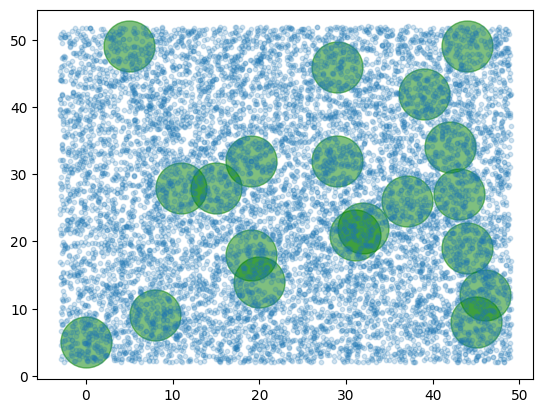

In [6]:
samplex, sampley = zip(*sample_list)
samplex = list(samplex)
sampley = list(sampley)
plt.scatter(x=x_data, y=y_data, s = RADIUS * 450, marker='o', alpha = 0.5, c='green')
plt.scatter(samplex, sampley, s = 10, alpha=0.2,)

plt.show()

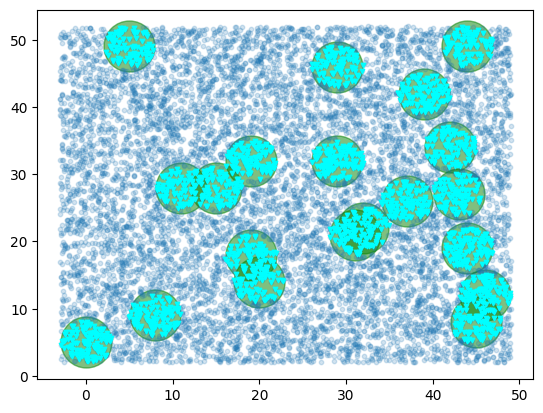

Radius: 3, N_Nodes: 20, N_SAMPLE: 10000, 
S_: 528.0600000000001, IF NOT OVERLOOP: 565.4866776461628
528.0600000000001


In [7]:
# 初始计数
count = 0
valid_points = []

# 遍历Hashmap
for sample in sample_list:
    for circle in circle_list:
        if judge_distance(sample, circle, RADIUS):
            valid_points.append(sample)
            count += 1
            break

validx, validy = zip(*valid_points)
validx = list(validx)
validy = list(validy)

plt.scatter(x=x_data, y=y_data, s = RADIUS * 450, marker='o', alpha = 0.5, c='green')
plt.scatter(samplex, sampley, s = 10, alpha=0.2,)
plt.scatter(validx, validy,s=10, marker='v', c = 'cyan')
plt.show()
# Final
print("Radius: {}, N_Nodes: {}, N_SAMPLE: {}, \nS_: {}, IF NOT OVERLOOP: {}".format(RADIUS, N, N_sample, count/N_sample * S_rect, N*RADIUS*RADIUS*math.pi))
print(count/N_sample * S_rect)
